In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import Callback
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# load the dataset
f = open('finalFeatures.txt', 'r')
dataset = f.read()
f.close()

dataset = dataset.split('\n')
dataset = [ data.split(" ")[:-1] for data in dataset ]
dataset.pop()
dataset = np.array(dataset)

In [3]:
labels = dataset[:, 1:2].flatten()
features = dataset[:, 2:]
features = features.astype('float64')
for i in range(features.shape[1]):
  features[:, i:i+1] -= features[:, i:i+1].min()
  if features[:, i:i+1].max() != 0:
    features[:, i:i+1] /= features[:, i:i+1].max()

In [4]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [5]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(features, dummy_y, test_size=0.2, random_state=42, stratify=dummy_y)

In [6]:
# define model
def model():
	# create model
	model = Sequential()
	model.add(Dense(17, input_dim=features.shape[1], activation='sigmoid'))
	model.add(Dense(7, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	visual = plot_model(model, show_shapes=True, show_layer_names=True)
	return model, visual

model, visual = model()

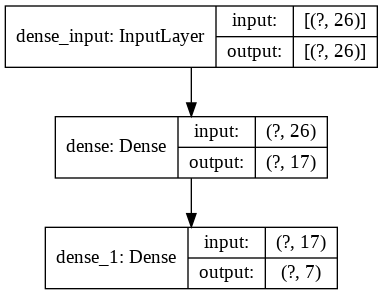

In [7]:
# plotting model
visual

In [ ]:
model.fit(
    X_train,
    y_train,
    batch_size=5,
    epochs=500,
    verbose=1,
    callbacks=[],
)

Epoch 1/500
86/86 [==============================] - 0s 1ms/step - loss: 1.9490 - accuracy: 0.2033
Epoch 2/500
86/86 [==============================] - 0s 970us/step - loss: 1.8880 - accuracy: 0.2360
Epoch 3/500
86/86 [==============================] - 0s 1ms/step - loss: 1.8582 - accuracy: 0.2360
Epoch 4/500
86/86 [==============================] - 0s 1ms/step - loss: 1.8327 - accuracy: 0.2593
Epoch 5/500
86/86 [==============================] - 0s 1ms/step - loss: 1.8055 - accuracy: 0.2780
Epoch 6/500
86/86 [==============================] - 0s 966us/step - loss: 1.7773 - accuracy: 0.3131
Epoch 7/500
86/86 [==============================] - 0s 1ms/step - loss: 1.7469 - accuracy: 0.3248
Epoch 8/500
86/86 [==============================] - 0s 1000us/step - loss: 1.7172 - accuracy: 0.3505
Epoch 9/500
86/86 [==============================] - 0s 1ms/step - loss: 1.6883 - accuracy: 0.3318
Epoch 10/500
86/86 [==============================] - 0s 1ms/step - loss: 1.6624 - accuracy: 0.3551
Ep

In [ ]:
res = model.evaluate(
    X_test,
    y_test,
    batch_size=5,
    verbose=1,
    callbacks=[],
)

22/22 [==============================] - 0s 972us/step - loss: 0.9048 - accuracy: 0.6729


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.array([ np.argmax(pred) for pred in y_pred ])
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred).astype('float64')

for i in range(len(matrix)):
  matrix[i] *= 100 / matrix[i].sum()

df = pd.DataFrame(data=matrix, index=encoder.inverse_transform([i for i in range(7)]), columns=encoder.inverse_transform([i for i in range(7)]))

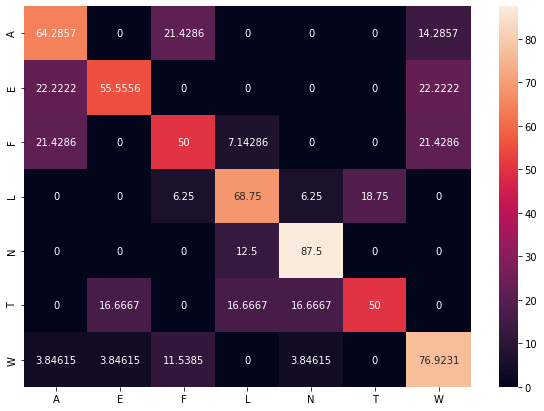

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(df, annot=True, fmt='g')